The dataset represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
                                                                                                                  -- Kaggle

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
os.getcwd()

'C:\\Users\\helle\\Desktop\\Big Data Analysis\\project'

In [3]:
#load the data
df_data = pd.read_csv('C:\\Users\\helle\\Desktop\\Big Data Analysis\\project\\avocado.csv')

# Tasks
##-- to find some interesting insights behind the data
##-- to use Python Module to analyze and visulize the data
##-- to predict price in future

# Explore the data
##--Dataset shape and data type 
 ##--4046,4225,4770 are Size & Product Look Up (PLU) Code, which are uesd to identify the size of Hass Avocado,   https://loveonetoday.com/how-to/identify-hass-avocados/
 ##-- Column 4046 means Total number of avocados with PLU 4046 sold
 ##-- Column AveragePrice means the average price of a single avocado  
 ##-- Column SmallBags LargeBags XLargeBags means that multiple units (avocados) are sold in bags
 ##-- Column type and region, checked in the following codes

In [4]:
df_data.shape

(18249, 14)

In [5]:
df_data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
df_data.tail()

In [ ]:
#The dataset contains sales data from 2015 January to 2018 March

In [6]:
# how many types of avocado?
df_data['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [7]:
#how many regions?
region=df_data['region'].unique()
print(region)
number_region=np.size(region)
print('How many different values in column regions?  ',number_region)

['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']
How many different values in column regions?   54


# Data Cleaning
-- check the null value 
-- check the Outliers

In [8]:
df_data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [10]:
# for Column regions
#some value refers to two cities, for example,'BaltimoreWashington','NewOrleansMobile'
#some value refers to a big region, for exzample, 'West' refers to 13 States,https://en.wikipedia.org/wiki/Western_United_States
#some value has spelling mistakes,'WestTexNewMexico'
#extract a sub dataset,the column 'region' only contains city

forbidden_list = ['GreatLakes','Midsouth','Northeast','NorthernNewEngland','Plains','SouthCentral','Southeast','TotalUS','West',
                  'WestTexNewMexico','SouthCarolina','California']
mask=df_data['region'].isin(forbidden_list)
temp_data=df_data[~mask]

temp_data.shape
#temp_data['region'].unique()
#np.size(temp_data['region'].unique())

(14196, 14)

# Data Analysis and Visulizaiton
##-- market share of conventional avocado and organic avocado

#### Total Volume

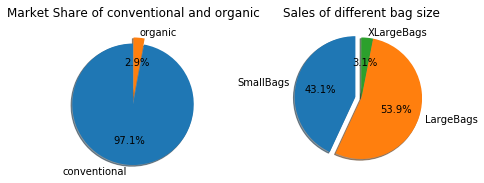

In [11]:
fig, axes = plt.subplots(ncols=2)
fig.tight_layout()
plt.subplots_adjust(wspace =0.5, hspace =0.5)
for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])

# to draw a pie chart showing the market shares
TotalVolume=temp_data.groupby('type')['Total Volume'].agg('sum') #calculate total volumn for types of avocado
values1=[TotalVolume['conventional'],TotalVolume['organic']] 
labels1=['conventional','organic']
explode1 = (0.1, 0)
axes[0].pie(values1,explode=explode1,labels=labels1,autopct='%1.1f%%',shadow=True,startangle=90)
axes[0].set(title='Market Share of conventional and organic')
# to draw another pie chart showing portions of sales of each size bag
values2=[temp_data['Small Bags'].agg('sum'),df_data['Large Bags'].agg('sum'),df_data['XLarge Bags'].agg('sum')]
labels2=['SmallBags','LargeBags','XLargeBags']
explode2 = (0.1,0,0)
axes[1].pie(values2,explode=explode2,labels=labels2,autopct='%1.1f%%',shadow=True,startangle=90)
axes[1].set(title='Sales of different bag size')
plt.show()

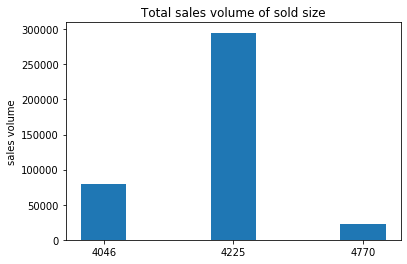

In [12]:
#to draw a bar chart to show the sales volume of each sold size of Hass avocado
fig, ax = plt.subplots()
values3=[temp_data['4046'].agg('mean'),df_data['4225'].agg('mean'),df_data['4770'].agg('mean')]
#values3=[temp_data['4046'].agg('sum'),df_data['4225'].agg('sum'),df_data['4770'].agg('sum')]
labels3=['4046','4225','4770']
width = 0.35 

ax.bar(labels3,values3,width)
ax.set(title="Total sales volume of sold size",xlabel='',ylabel='sales volume')
plt.show()

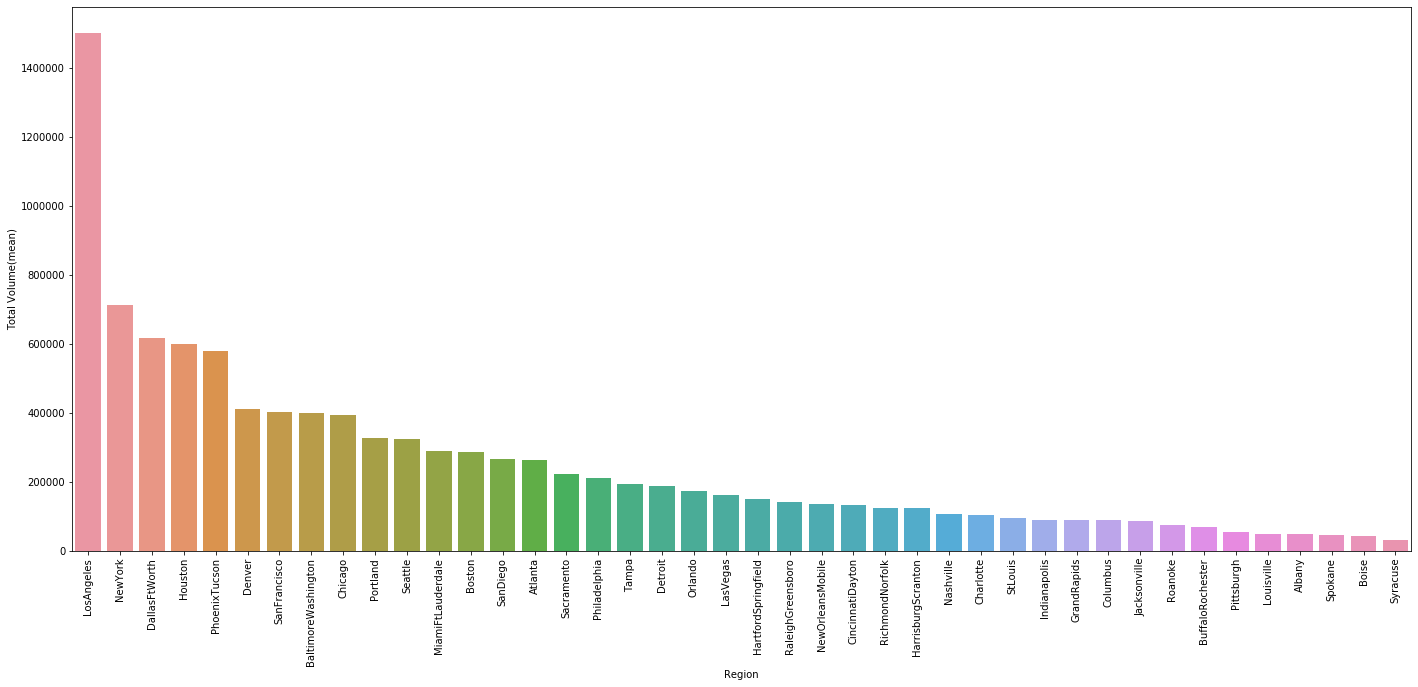

,region,Total Volume
20,LosAngeles,1.502653e+06
25,NewYork,7.122311e+05
10,DallasFtWorth,6.166251e+05
16,Houston,6.010884e+05
28,PhoenixTucson,5.788264e+05


In [13]:
#to draw a bar chart to show the Total volume of each regions
Region_data=pd.DataFrame(temp_data.groupby('region')['Total Volume'].agg('mean'))
Region_data=Region_data.reset_index()
new_index=Region_data['Total Volume'].sort_values(ascending=False).index.values
sorted_Region=Region_data.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_Region['region'],y=sorted_Region['Total Volume'])
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Total Volume(mean)')
plt.show()
sorted_Region.head()

In [14]:
from datetime import datetime
temp_data.loc[:,'date'] = pd.to_datetime(temp_data.loc[:,'Date'], infer_datetime_format=True)

D:\Users\helle\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Users\helle\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
#Another method to extract month and date, tpye is int
#dt=temp_data['date'].astype(str) 
#dt = dt.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
#temp_data['Month'] = dt.map(lambda x: x.month) 
#temp_data['Year']=dt.map(lambda x:x.year)

D:\Users\helle\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """


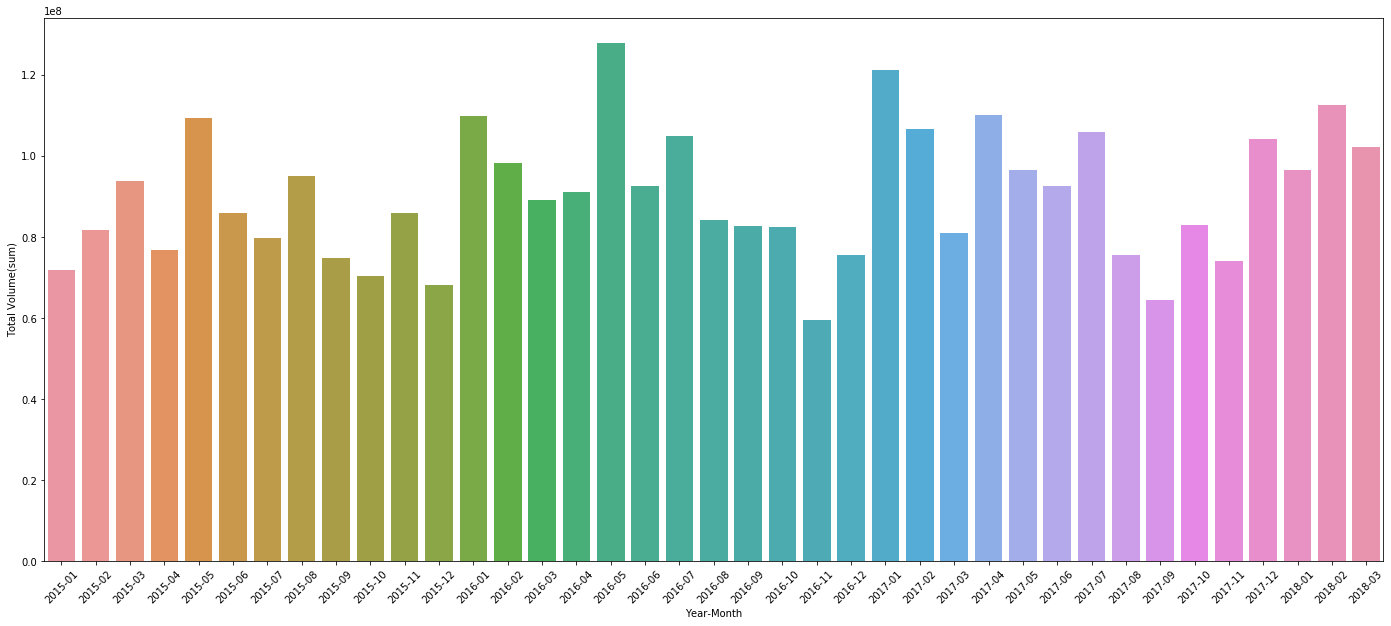

In [15]:
#to draw a bar chart to show the Total volume of each month
#temp_data will have new columns to represent data
#temp_data.shape    #original 

temp_data.loc[:,'Year'],temp_data.loc[:,'Month'],temp_data.loc[:,'Day'] = temp_data.loc[:,'Date'].str.split('-').str
temp_data.loc[:,'Year-Month']=temp_data.loc[:,'Year']+'-'+temp_data.loc[:,'Month']
#temp_data.loc[:,'Year-Month'] = pd.to_datetime(temp_data.loc[:,'Year-Month'], infer_datetime_format=True)
YM_data=pd.DataFrame(temp_data.groupby('Year-Month')['Total Volume'].agg('sum')).reset_index()

plt.figure(figsize=(24,10))
ax=sns.barplot(x=YM_data.loc[:,'Year-Month'],y=YM_data.loc[:,'Total Volume'])
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Total Volume(sum)')
plt.show()
#temp_data.head()
#temp_data.info()

#### Average Price

In [16]:
#to check basic statistic infomation
temp_data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,14196.000000,14196.000000,1.419600e+04,1.419600e+04,1.419600e+04,14196.000000,1.419600e+04,1.419600e+04,14196.000000,14196.000000,14196.000000
mean,24.236686,1.416943,2.477539e+05,7.903968e+04,8.930917e+04,6946.233826,7.245841e+04,5.586970e+04,15663.938617,924.766291,2016.147929
std,15.483793,0.414025,4.415759e+05,1.990036e+05,1.689518e+05,20398.493888,1.471054e+05,1.284282e+05,42052.534209,3952.971200,0.939949
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000
25%,10.000000,1.110000,8.337228e+03,5.415850e+02,2.081160e+03,0.000000,3.376592e+03,1.662700e+03,51.110000,0.000000,2015.000000
50%,24.000000,1.370000,6.452428e+04,4.711360e+03,1.742749e+04,90.960000,2.384497e+04,1.605937e+04,1602.910000,0.000000,2016.000000
75%,38.000000,1.680000,2.975943e+05,7.342060e+04,9.286282e+04,3073.990000,8.066871e+04,6.291976e+04,10597.055000,43.307500,2017.000000
max,52.000000,3.250000,5.470227e+06,2.914047e+06,2.283465e+06,279630.350000,2.701610e+06,2.656630e+06,706052.840000,61316.940000,2018.000000


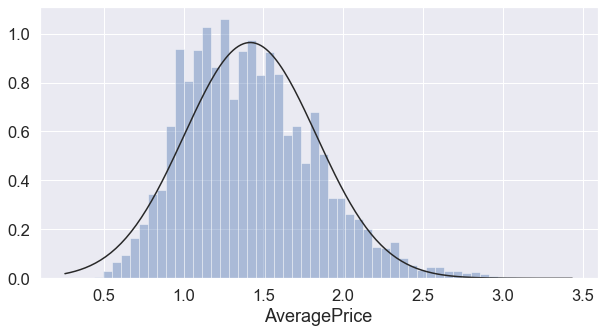

In [17]:
#to use normal distribution to fit the data
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(a=temp_data.AveragePrice, kde=False, fit=norm)

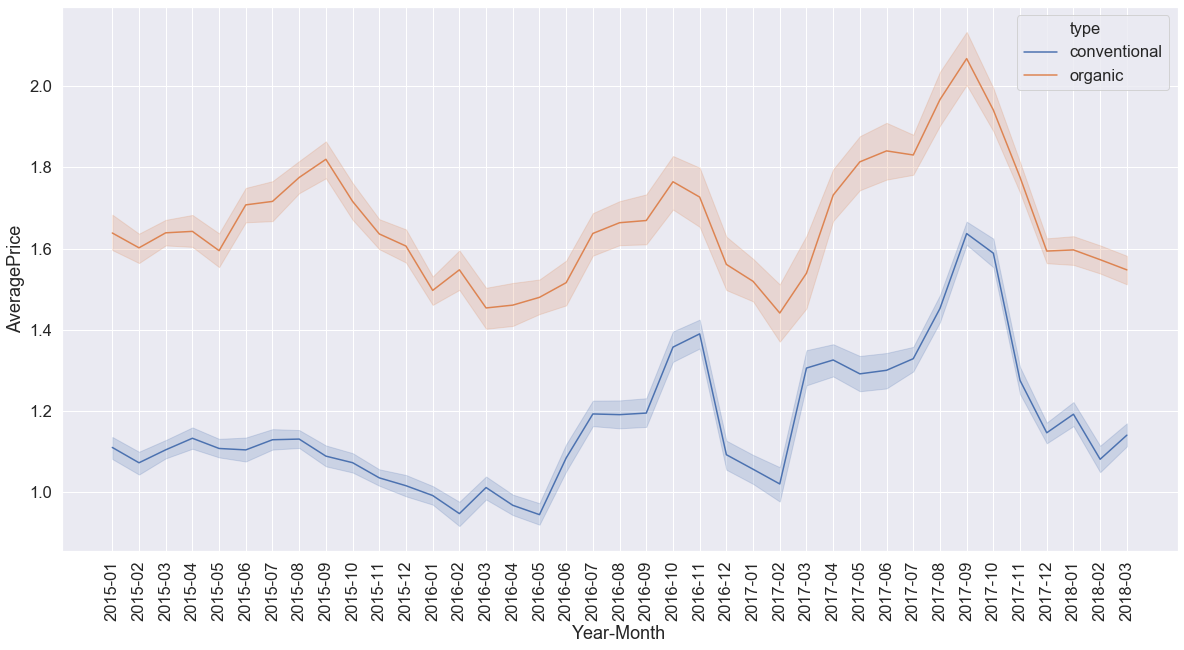

In [18]:
#to draw a line chart to show Average Price of each month
#here draw two lines to represent two types of Avocado
plt.figure(figsize=(20,10))
sns.lineplot(x="Year-Month", y="AveragePrice", hue='type',data=temp_data)
plt.xticks(rotation=90)
plt.show()

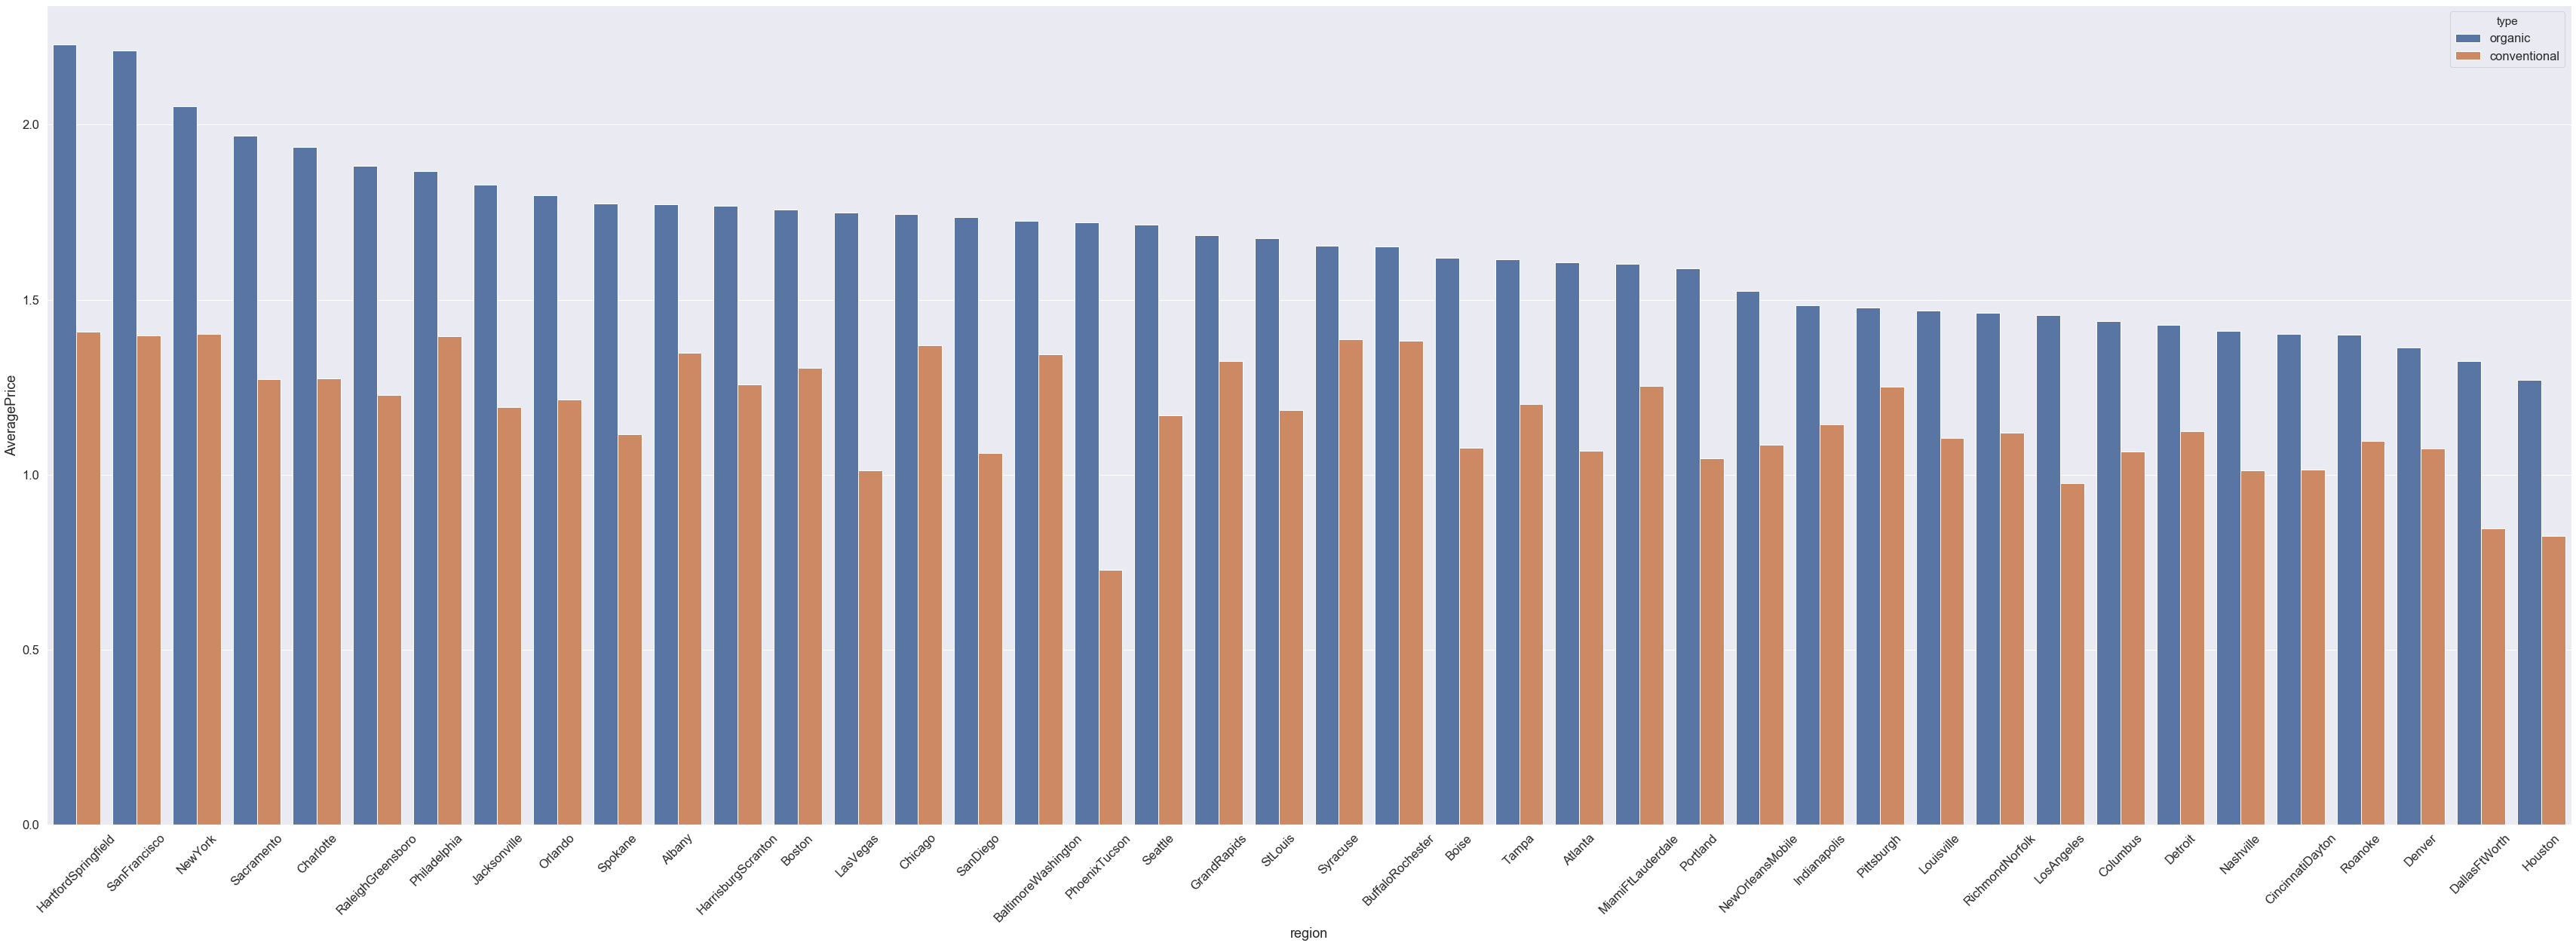

,region,type,AveragePrice
57,PhoenixTucson,organic,1.720651
56,PhoenixTucson,conventional,0.728225


In [19]:
#to draw a bar chart to show Average Price of each type in each city
Ave_Region=pd.DataFrame(temp_data.groupby(['region','type'])['AveragePrice'].agg('mean')).reset_index()
new_index=Ave_Region['AveragePrice'].sort_values(ascending=False).index.values
sorted_Ave_Region=Ave_Region.reindex(new_index)

plt.figure(figsize=(60,20))
sns.barplot(x='region', y='AveragePrice', hue='type',data=sorted_Ave_Region)
plt.xticks(rotation=45)
plt.show()

sorted_Ave_Region.head()
#sorted_Ave_Region.tail()
#in PhoenixTucson, the price diffrence is the biggest
sorted_Ave_Region[sorted_Ave_Region['region']=='PhoenixTucson']

In [20]:
YM_Volume=pd.DataFrame(temp_data.groupby('Year-Month')['Total Volume'].agg('sum')).reset_index()

AveragePrice=pd.DataFrame(temp_data.groupby('Year-Month')['AveragePrice'].agg('mean')).reset_index()

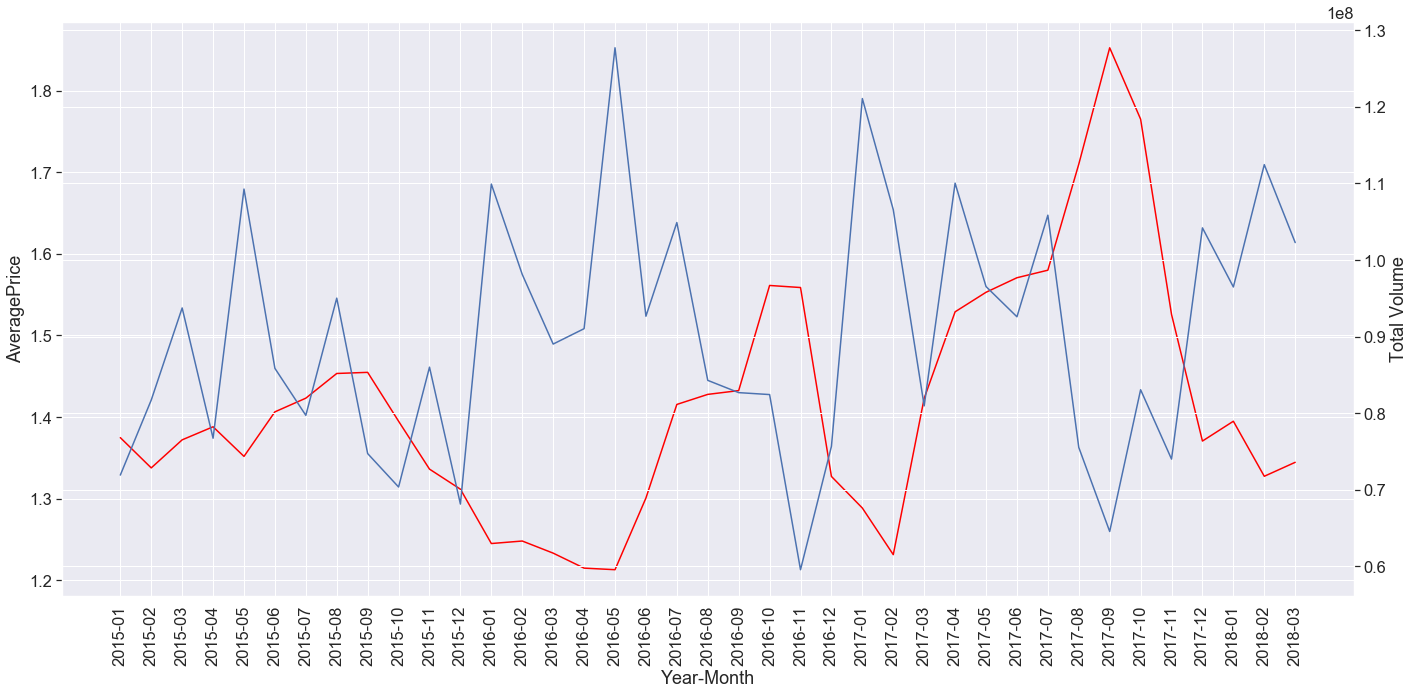

In [21]:
plt.figure(figsize=(20,10))
ax=sns.lineplot(x='Year-Month', y='AveragePrice', data=AveragePrice,color='red')
plt.xticks(rotation=90)
ax2 = ax.twinx()
ax2=sns.lineplot(x='Year-Month',y='Total Volume',data=YM_Volume)

plt.tight_layout()
plt.show()

#### Price Prediction

In [22]:
#delete columns to make the dataset concise
temp_data=temp_data.drop(columns=['Year','Month','Day'],axis=1)

In [ ]:
#sub_data['date'] = pd.to_datetime(sub_data['Date'], infer_datetime_format=True)

In [23]:
#extract a sub dataset to predict price
#this sub dataset focus on conventional type and New Yor city
#sub_data=temp_data[temp_data['type']=='conventional']

#region_list=['NewYork','PhoenixTucson','SanFrancisco','HartfordSpringfield']
region_list=['NewYork']
mask = temp_data['region'].isin(region_list)
sub_data=temp_data[mask]
sub_data=sub_data[sub_data['type']=='conventional']
#sub_data['region'].unique()

In [24]:
sub_data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,date,Year-Month
1456,0,2015-12-27,1.17,1129876.05,13711.19,872603.60,894.58,242666.68,208470.99,34191.25,4.44,conventional,2015,NewYork,2015-12-27,2015-12
1457,1,2015-12-20,1.23,1139347.98,13998.35,867406.68,803.83,257139.12,212615.20,44523.92,0.00,conventional,2015,NewYork,2015-12-20,2015-12
1458,2,2015-12-13,1.12,1254805.29,15990.38,975504.52,1657.92,261652.47,222446.62,39205.85,0.00,conventional,2015,NewYork,2015-12-13,2015-12
1459,3,2015-12-06,1.20,1068971.54,15730.10,887708.08,892.62,164640.74,136643.23,27997.51,0.00,conventional,2015,NewYork,2015-12-06,2015-12
1460,4,2015-11-29,1.16,999169.64,13652.41,814571.57,863.58,170082.08,139508.76,30573.32,0.00,conventional,2015,NewYork,2015-11-29,2015-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8821,7,2018-02-04,1.28,2959541.38,96084.63,2250967.25,3253.28,609236.22,569361.35,38734.78,1140.09,conventional,2018,NewYork,2018-02-04,2018-02
8822,8,2018-01-28,1.20,2278728.69,82652.82,1501055.47,745.50,694274.90,675215.26,18491.86,567.78,conventional,2018,NewYork,2018-01-28,2018-01
8823,9,2018-01-21,1.27,2135242.76,46444.43,1642533.16,1165.10,445100.07,423570.05,21523.99,6.03,conventional,2018,NewYork,2018-01-21,2018-01
8824,10,2018-01-14,1.67,1294149.71,39681.84,818051.50,1338.06,435078.31,415694.04,19384.27,0.00,conventional,2018,NewYork,2018-01-14,2018-01


In [25]:
from datetime import datetime
sub_data.loc[:,'date_ordinal'] = sub_data.loc[:,'date'].apply(datetime.toordinal)

In [ ]:
#sub_data

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

features = ['date_ordinal', 'Total Volume']
label = 'AveragePrice'
regressor = GradientBoostingRegressor()
X = sub_data[features]
y = sub_data[label]
regressor.fit(X, y)
y_pred = regressor.predict(X)
mask = (y != y_pred)
sub_data_wrong=sub_data[mask]
sub_data_wrong

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,date,Year-Month,date_ordinal
1456,0,2015-12-27,1.17,1129876.05,13711.19,872603.60,894.58,242666.68,208470.99,34191.25,4.44,conventional,2015,NewYork,2015-12-27,2015-12,735959
1457,1,2015-12-20,1.23,1139347.98,13998.35,867406.68,803.83,257139.12,212615.20,44523.92,0.00,conventional,2015,NewYork,2015-12-20,2015-12,735952
1458,2,2015-12-13,1.12,1254805.29,15990.38,975504.52,1657.92,261652.47,222446.62,39205.85,0.00,conventional,2015,NewYork,2015-12-13,2015-12,735945
1459,3,2015-12-06,1.20,1068971.54,15730.10,887708.08,892.62,164640.74,136643.23,27997.51,0.00,conventional,2015,NewYork,2015-12-06,2015-12,735938
1460,4,2015-11-29,1.16,999169.64,13652.41,814571.57,863.58,170082.08,139508.76,30573.32,0.00,conventional,2015,NewYork,2015-11-29,2015-11,735931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8821,7,2018-02-04,1.28,2959541.38,96084.63,2250967.25,3253.28,609236.22,569361.35,38734.78,1140.09,conventional,2018,NewYork,2018-02-04,2018-02,736729
8822,8,2018-01-28,1.20,2278728.69,82652.82,1501055.47,745.50,694274.90,675215.26,18491.86,567.78,conventional,2018,NewYork,2018-01-28,2018-01,736722
8823,9,2018-01-21,1.27,2135242.76,46444.43,1642533.16,1165.10,445100.07,423570.05,21523.99,6.03,conventional,2018,NewYork,2018-01-21,2018-01,736715
8824,10,2018-01-14,1.67,1294149.71,39681.84,818051.50,1338.06,435078.31,415694.04,19384.27,0.00,conventional,2018,NewYork,2018-01-14,2018-01,736708


In [ ]:
#all the prediction is wrong
#try to use another method to predict price
#fbprophet is uesful to time series

In [28]:
from fbprophet import Prophet

In [29]:
m = Prophet()
date_AveragePrice = sub_data.rename(columns={'date':'ds', 'AveragePrice':'y'})
m.fit(date_AveragePrice)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
529,2019-03-21,1.266305,1.043288,1.493211
530,2019-03-22,1.270640,1.040328,1.485544
531,2019-03-23,1.274962,1.058207,1.482911
532,2019-03-24,1.279223,1.057882,1.497625
533,2019-03-25,1.283370,1.042917,1.498087


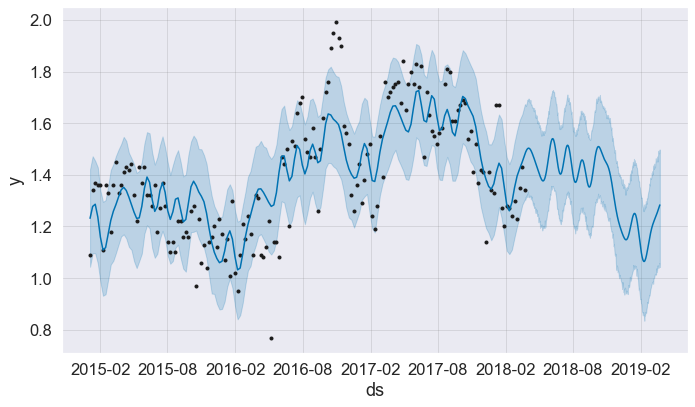

In [30]:
fig1 = m.plot(forecast)

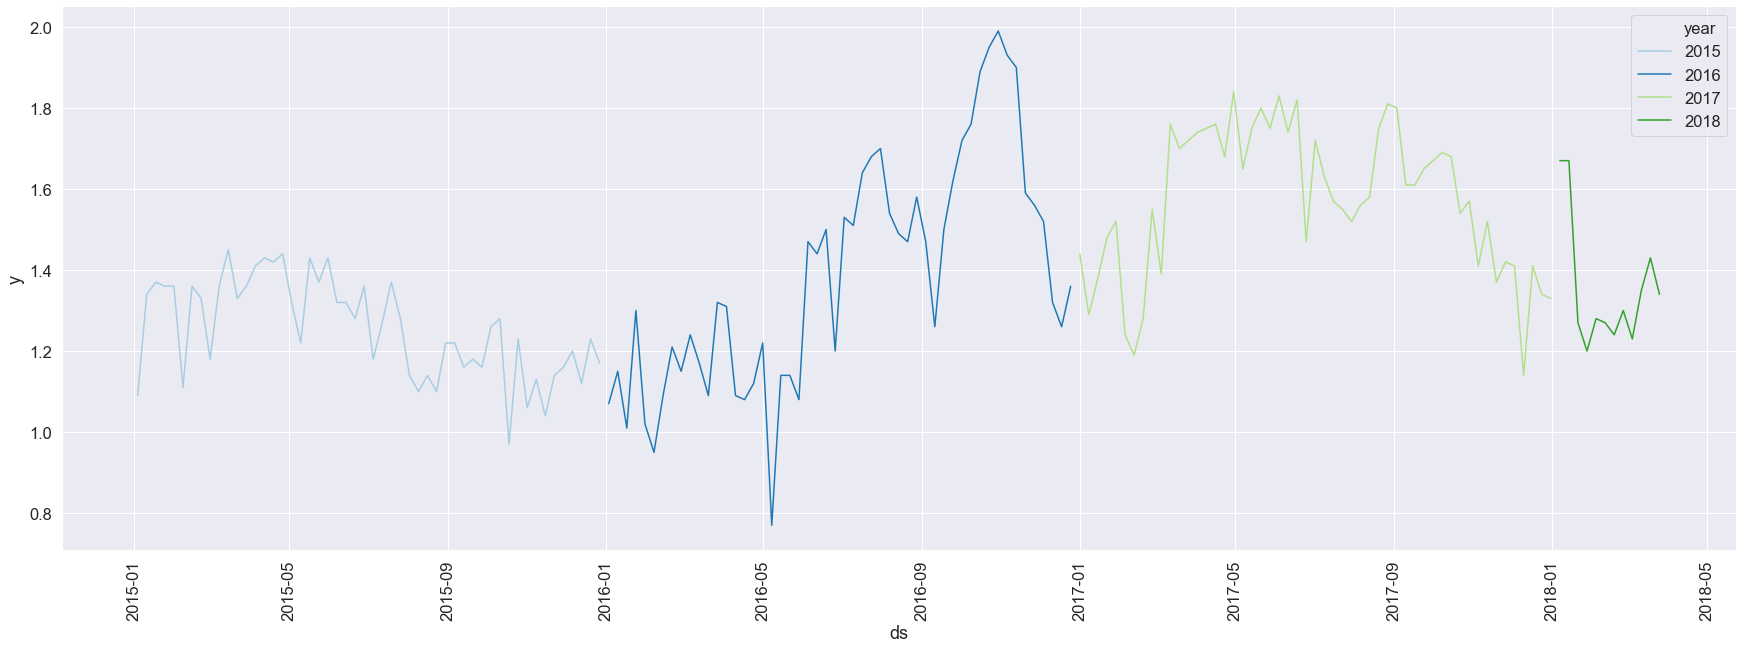

In [31]:
#Average price line chart using the original data
plt.figure(figsize=(30,10))
sns.lineplot(x="ds", y="y", hue='year',palette='Paired',data=date_AveragePrice)
plt.xticks(rotation=90)
plt.show()

In [32]:
#double check the original data of 2016, 
#because there are some price closed to 2 dollars in the forecast fitting chart and average price chart 
date_AveragePrice[np.logical_and(date_AveragePrice['year']==2016,date_AveragePrice['y']>1.5)]

,Unnamed: 0,Date,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,ds,Year-Month,date_ordinal
4267,3,2016-12-04,1.52,960475.67,13893.11,696042.02,2350.43,248190.11,214068.14,33668.33,453.64,conventional,2016,NewYork,2016-12-04,2016-12,736302
4268,4,2016-11-27,1.56,970753.07,15264.26,696848.85,2022.90,256617.06,223707.17,32610.95,298.94,conventional,2016,NewYork,2016-11-27,2016-11,736295
4269,5,2016-11-20,1.59,1093097.04,16970.61,732069.33,2999.16,341057.94,303438.25,35803.02,1816.67,conventional,2016,NewYork,2016-11-20,2016-11,736288
4270,6,2016-11-13,1.90,830018.48,12169.08,523321.98,2970.03,291557.39,248573.27,42984.12,0.00,conventional,2016,NewYork,2016-11-13,2016-11,736281
4271,7,2016-11-06,1.93,767190.62,10277.48,460230.47,3519.45,293163.22,250705.71,42457.51,0.00,conventional,2016,NewYork,2016-11-06,2016-11,736274
4272,8,2016-10-30,1.99,618279.77,9264.98,435952.49,1595.64,171466.66,148756.72,21484.94,1225.00,conventional,2016,NewYork,2016-10-30,2016-10,736267
4273,9,2016-10-23,1.95,807564.93,11212.72,512038.46,2086.69,282227.06,275967.53,5009.53,1250.00,conventional,2016,NewYork,2016-10-23,2016-10,736260
4274,10,2016-10-16,1.89,969846.54,15611.16,636341.88,1794.03,316099.47,279470.03,35805.83,823.61,conventional,2016,NewYork,2016-10-16,2016-10,736253
4275,11,2016-10-09,1.76,1031060.45,20086.94,688905.67,1806.94,320260.90,272661.39,47381.07,218.44,conventional,2016,NewYork,2016-10-09,2016-10,736246
4276,12,2016-10-02,1.72,1057930.65,33926.41,658467.15,3847.42,361689.67,310800.35,50151.82,737.50,conventional,2016,NewYork,2016-10-02,2016-10,736239


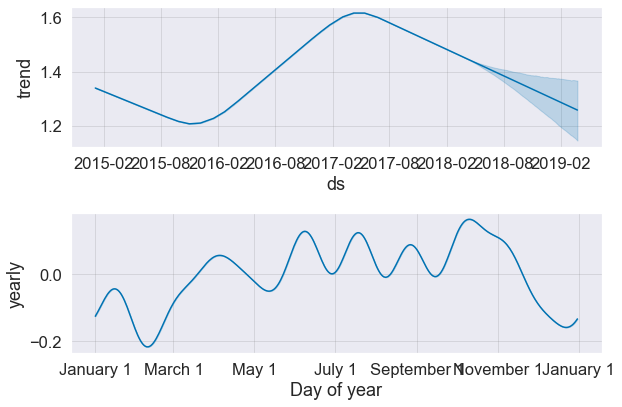

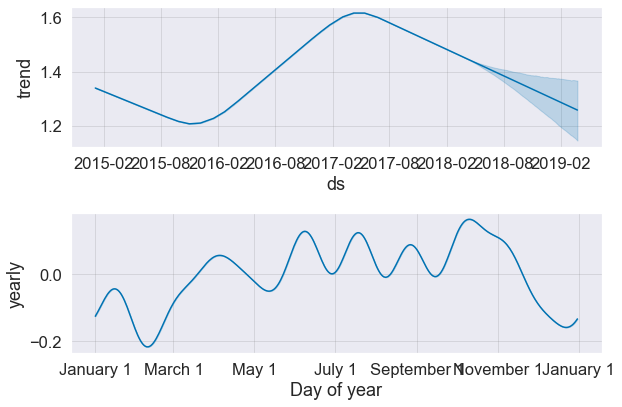

In [33]:
m.plot_components(forecast)